Benchmarks
==========
Replications of published work using **ionize** to verify results.

In [8]:
from __future__ import print_function, absolute_import, division
import ionize
import numpy as np
from matplotlib import pyplot as plot
%matplotlib inline
numpy.set_printoptions(precision=3)

## Basic principles of electrolyte chemistry for microfluidic electrokinetics. Part I: Acid–base equilibria and pH buffers
Persat,  2009


/Users/lewis/Documents/github/ionize/ionize/Solution/equilibrium.py:143: UserWarning: Ionic strength > 1M. Ionic stregth correction may be inaccurate.
  warnings.warn(('Ionic strength > 1M. '


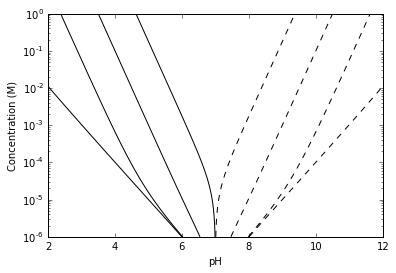

In [16]:
pKa = [4.75, 7, 9.25]
c = np.logspace(-6, 0)

for valence, extra_pKa, style in [(-1, -2, 'k'), (1, 16, '--k')]:
    for k in pKa + [extra_pKa]:
        ion = ionize.Ion('dummy', [valence], [k], [valence])
        pH = [ionize.Solution(ion, cp).pH for cp in c]
        plot.semilogy(pH, c, style)
        
plot.xlim(2, 12)
plot.xlabel('pH')
plot.ylabel('Concentration (M)')
plot.show()

**Fig 1** Flood’s diagram for strong and weak acids (solid lines), and strong and weak bases (dashed lines) in solution. The left half of the diagram corresponds to the logarithm of total concentration of a single acid as a function of pH. The pH of weak acids deviates from the strong acid relation pH 1⁄4  log10cA. pH always decreases with addition of weak acid, but more and more weakly as their pKaincreases. Similarly, weak bases deviate from the effect of strong base on pH (pH 1⁄4 14 + log10cB). For the same base concentration, the pH of a stronger base (higher pKa) is higher than for a weak base.

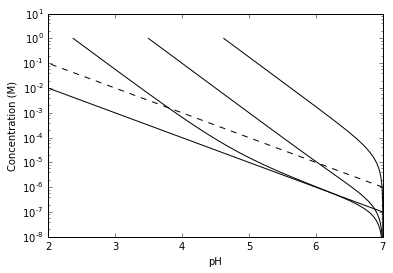

In [33]:
pKa = [4.75, 7, 9.25]
c = np.logspace(-8, 0)
valence = -1

for k in pKa:
        ion = ionize.Ion('dummy', [valence], [k], [valence])
        pH = [ionize.Solution(ion, cp).pH for cp in c]
        plot.semilogy(pH, c, 'k')

plot.semilogy(-np.log10(c), c, 'k')
plot.semilogy(-np.log10(c), 10*c, '--k')
# plot.Rectangle((0, 1e-3), 3, 100, color='b') # fix area plot
plot.xlim(2, 7)
plot.xlabel('pH')
plot.ylabel('Concentration (M)')
plot.show()

**Fig 2** The concentration of the conjugate base of three weak acids as a function of pH illustrates the moderate pH approximation in acidic conditions. The lines labelled log10cH and 1 + log10cH represent the 1  and 10  concentration of hydronium ions, respectively. The moderate pH zone is the width of the grey area. In this zone, buffer ion concen- trations of about 1 mM and higher (height of grey zone) ensure cA, 1 $ 10 cH. Note that in the case of a strong acid (resp. base) alone in solution, the moderate pH approximation cannot hold as cA, 1 1⁄4 cH (resp. cB,+1 1⁄4 cOH for a strong base).

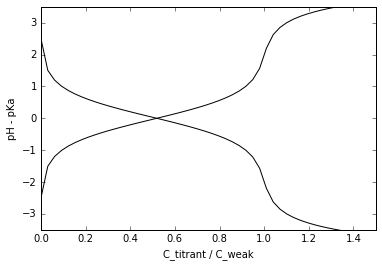

In [52]:
ratio = np.linspace(0, 1.5)
pKa = 7
conc = 0.01

weak_acid = ionize.Ion('weak acid', [-1], [pKa], [-1])
weak_base = ionize.Ion('weak base', [1], [pKa], [1])
strong_acid = ionize.Ion('strong acid', [-1], [3], [-1])
strong_base = ionize.Ion('strong base', [1], [11], [1])

for weak_ion, strong_ion in ((weak_acid, strong_base), 
                             (weak_base, strong_acid)):
    pH = [ionize.Solution([weak_ion, strong_ion], 
                           [conc, r*conc]).pH for r in ratio]
    pH = np.array(pH)
    plot.plot(ratio, pH - pKa, 'k')
    
plot.xlim(0, 1.5)
plot.ylim(-3.5, 3.5)
plot.xlabel('C_titrant / C_weak')
plot.ylabel('pH - pKa')
plot.show()

**Fig 3** Titration of a weak acid (or base) by strong base (or acid). The difference between the buffer’s pH and the weak electrolyte’s pKa (pKweak) is plotted as a function of the concentration ratio of strong electrolyte (titrant) to weak electrolyte ctitrant/cweak. The solid portion of the curves assume moderate pH. The buffer’s sensitivity to titrant is lowest when ctitrant/cweak 1⁄4 0.5, at which point pH 1⁄4 pKweak, also called the half titration point. Buffer pH is most sensitive to addition of titrant when ctitrant z cweak or when ctitrant z 0. In these regions (marked by dashed lines), the moderate pH assumption breaks down, and the exact shape of the curve will depend strongly on the species’ pKa and the weak acid’s concentration. The inflection point which occurs at ctitrant 1⁄4 cweak (marked by ‘x’) is known as the equivalence point.